In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/ameliyea/Scraping_Article_X_Demo_DPR_and_Police_2025/Fix_Final_Berita_dan_Tweet.csv", sep=';')
#separator masih ; karena Content masih mengandung banyak koma

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Time     6691 non-null   object
 1   Content  6691 non-null   object
 2   Source   6691 non-null   object
dtypes: object(3)
memory usage: 156.9+ KB


In [ ]:
df.isnull().sum()

Time       0
Content    0
Source     0
dtype: int64

In [ ]:
df.sort_values(by='Time', ascending=True) #kita cek seberapa memanas topik dilihat dari Time

Time  \
6611  2025-08-01 00:37:00+00:00   
6629  2025-08-01 07:45:00+00:00   
6632  2025-08-01 10:15:00+00:00   
5848  2025-08-01 10:41:00+00:00   
5849  2025-08-01 10:44:00+00:00   
...                         ...   
1705  2025-09-02 14:40:23+00:00   
1704  2025-09-02 14:40:33+00:00   
1703  2025-09-02 14:40:47+00:00   
1702  2025-09-02 14:40:54+00:00   
1701  2025-09-02 14:41:00+00:00   

                                                Content  \
6611  Kebakaran terjadi di Kantor Camat Delanggu, Kl...   
6629  Pemerintah menegaskan beras premium di ritel t...   
6632  Kebakaran menimpa beberapa ruangan kompleks Ka...   
5848  Mencari donat dengan rasa enak dan topping mel...   
5849  PSIM Jogja telah menggelar beberapa laga uji c...   
...                                                 ...   
1705  Rivalitas Jokowi vs Prabowo Semakin Nyata http...   
1704  @adyazaa Mau naik transum atau bahkan sekedar ...   
1703  @love_dhisarrrra @RezzClass24 @barengwarga ber...   
1702  @poetjoonie_ kenapeee yang jaga sekampung anyi...   
1701  @Selera_muuu heya kakak bisa di aku! all in st...   

                            Source  
6611  detik_demo_jogja_artikel.csv  
6629  detik_demo_jogja_artikel.csv  
6632  detik_demo_jogja_artikel.csv  
5848  detik_demo_jogja_artikel.csv  
5849  detik_demo_jogja_artikel.csv  
...                            ...  
1705                       Twitter  
1704                       Twitter  
1703                       Twitter  
1702                       Twitter  
1701                       Twitter  

[6691 rows x 3 columns]

In [ ]:
pd.set_option('display.max_colwidth', None)
df

Time  \
0     2025-09-02 02:56:39+00:00   
1     2025-09-02 02:52:50+00:00   
2     2025-09-02 02:50:43+00:00   
3     2025-09-02 02:49:03+00:00   
4     2025-09-02 02:47:49+00:00   
...                         ...   
6686  2025-08-15 17:50:00+00:00   
6687  2025-08-05 21:47:00+00:00   
6688  2025-08-02 12:31:00+00:00   
6689  2025-08-22 19:48:00+00:00   
6690  2025-08-15 14:49:00+00:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

#Import Library

In [ ]:
!pip install py Sastrawi

In [ ]:
!pip install keras

In [ ]:
import re
import string
import json
import pandas as pd
import seaborn as sns
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#1. Text Cleaning and Preprocessing

## **Regular Expression** to Handling AGE, DATE, TIME in article

#Penjelasan

**RegEx (Regular Expression)** bertujuan untuk mencari dan menemukan pola kata di dlm kalimat.
Contoh: raw string -> biar regex gk salah ngartiin \ di dlm string, misal \n
1. re.match(pattern, string)

match a word at the beginning of a string

2. re.search(pattern, string)

Matches the first occurrence of a pattern in the entire string(and not just at the beginning).

3. re.findall(pattern, string)

return all the occurrences of the pattern from the string (recommend, soalnya bisa kerja kombinasi diatasnya)

\b = a match where the specified pattern is at the beginning or at the end of a word.

\d = a match where the string contains digits (numbers from 0-9)

\D+ kebalikannya

\d+ = berguna buat extract digit yang sepaket, misal 19

\w = extraction of alphanumeric characters only (characters from a to Z, digits from 0-9, and the underscore _ character)

\W kebalikannya

Saat proses Data Cleaning di artikel, kita harus mempertimbangkan banyak hal termasuk tanggal, umur, dan pukul yang kerap muncul di suatu berita. Kemunculannya hampir semuanya unik dan tidak berulang di 'Content' lainnya, sehingga model bisa aja mengartikannya sebuah makna khusus. Selain itu, jika tanda baca di celaning semua, akan hilang maknanya sebuah time, tanggal, atau umur. Oleh karena itu, perlu di treatment khusus sehingga bisa mengurangi noise dan membantu topic modelling

In [ ]:
# Pola untuk TIME
regex_time = r'\d{1,2}[.:]\d{2}\s+(?:WIB|WITA|WIT)'

# Pola untuk AGE
regex_age = r'\(\d{1,2}\)' #ini buat format umur (59)

# Pola untuk DATE
months_list = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
regex_months_list = '|'.join(months_list)
pola_date_1 = r'\d{1,2}\s+(?:' + regex_months_list + r')\s+\d{4}'
pola_date_2 = r'\d{1,2}\s+(?:' + regex_months_list + r')'
pola_date_3 = r'\(\d{1,2}/\d{1,2}/\d{4}\)'
pola_date_4 = r'\(\d{1,2}/\d{1,2}\)'
regex_date = f'({pola_date_1})|({pola_date_2})|({pola_date_3})|({pola_date_4})'

# Pola untuk DAY
days_list = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
regex_day = '|'.join(days_list)

df['Content_clean'] = df['Content'].str.replace(regex_time, 'TIME', regex=True)
df['Content_clean'] = df['Content_clean'].str.replace(regex_age, 'AGE', regex=True)
df['Content_clean'] = df['Content_clean'].str.replace(regex_date, 'DATE', regex=True)
df['Content_clean'] = df['Content_clean'].str.replace(regex_day, 'DAY', regex=True)

In [ ]:
df[['Content', 'Content_clean']]

Content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                felix melawan!! #1312 https://t.co/ubxkF0CcFj   
1                                                                                                                                                                                  

## A. Cleaning

In [ ]:
drop_list = ['SCROLL', 'TO', 'CONTINUE', 'WITH', 'CONTENT']

def clean(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #hapus username twt
  text = re.sub(r'#\w+', '', text)  #hapus hashtag
  text = re.sub(r'RT[\s]+', '', text) #hapus retweet
  text = re.sub(r'https?://\S+', '', text) #hapus link/url
  text = re.sub(r' [^A-Za-z0-9\']', '', text) #hapus karakter selain huruf, angka sm tanda
  text = text.replace("&amp;", "&") #ngubah tanda & jadi aslinya
  emoji_pattern = re.compile(
      "["
      u"\U0001F600-\U0001F64F"  # Emoticon
      u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # Transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
      u"\U00002500-\U00002BEF"  # Chinese charactersD
      u"\U00002702-\U000027B0"  # Dingbats
      u"\U000024C2-\U0001F251"  # Enclosed characters
      "]+",
      flags=re.UNICODE,
  )
  text = emoji_pattern.sub(r'', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\s+', ' ', text).strip()
  text = ' '.join(word for word in text.split() if word not in drop_list)

  return text

In [ ]:
df['Content_clean'] = df['Content_clean'].apply(clean)
df['Content_clean']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         felix melawan
1                                                                                                                                                                                                                                                                                                                                                                                       

##B. Preprocessing

###B.1. Lowercase

Tidak mempertahankan huruf kapital karena tujuan akhir case ini adalah Topic Modelling

In [ ]:
def lowercase(text: str) -> str:
    words = text.split()
    processed_words = []
    for word in words:
        processed_words.append(word.lower())
    return " ".join(processed_words)

df['Content_clean'] = df['Content_clean'].apply(lowercase)

In [ ]:
df['Content_clean']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         felix melawan
1                                                                                                                                                                                                                                                                                                                                                                                       

###B.3. Normalization (Especially for Twitter)

In [ ]:
# Untuk Twitter
path_slang = '/content/combined_slang_words[1].txt'

# kamus normalisasi dari combined_slang_words.txt
slang_dict = {}
try:
    with open(path_slang, 'r') as f:
        slang_dict = json.load(f)
    print(f"Berhasil memuat {len(slang_dict)} kata dari kamus slang.")
except (json.JSONDecodeError, FileNotFoundError) as e:
    print(f"Gagal memuat kamus slang: {e}.")

# ubah slang ke kata normal
def normalize_text(text, slang_dictionary):
    tokens = text.split()

    normalized_tokens = []
    for token in tokens:
        normalized_token = slang_dictionary.get(token, token)
        normalized_tokens.append(normalized_token)

    return " ".join(normalized_tokens)

Berhasil memuat 1068 kata dari kamus slang.


In [ ]:
df['Content_clean'] = df['Content_clean'].apply(lambda x: normalize_text(x, slang_dict))
df.loc[df['Source'] == 'Twitter', 'Content_clean']

0                                                                                                                                                                     felix melawan
1       ngerusak fasum bikin ribut demo terus bikin flyer aksi palsu terus sekarang sebel sendiri ujung2nya serang kampus itu otak kalau tidak di dengkul dmn lagi teman-teman 1312
2                                                                                                             gabisa provokasi lagi di jakarta skrg pindah ke bandung wkwkwkkw 1312
3                       si jimin jimin itu agaknya tidak on sama sekali berarti benar dugaanku dulu kalau dia tidak update dia lagi galau cepat sembuh jimin cepat sembuh indonesia
4                                                                                                           sakit sih emang cari gara2 saja ini biar rakyat marah kaya kemarin 1312
                                                                                           ...                                                                                     
4777                                      sekuat apapun solidaritas kita jika lengah maka provokator bisa datang kapansaja intinya selalu hindari waspada hadapi provokasi yang ada
4778                                                                                            mari kita sampaikan aspirasi dengan cara damai dantentunya waspada hadapi provokasi
4779                                                                                  pastikan untuk waspada hadapi provokasi kita semua hadir untuk menggapai asa bukan kehancuran
4780                                                                                di tengah riuh aksi demo penting bagi kita untuk memilih tenang bersamawaspada hadapi provokasi
4781                                                                                                          hoaks gampang bikin panas stop sebelum share waspada hadapi provokasi
Name: Content_clean, Length: 4782, dtype: object

###B.4. Tokenisasi

In [ ]:
df['Content_clean'] = df['Content_clean'].apply(lambda x:x.split())
df['Content_clean']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [felix, melawan]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [ngerusak, fasum, bikin, ribut, demo, terus, bikin, flyer, aksi, palsu, terus, sekarang, sebel, sendiri, ujung2nya, serang, kampus, itu, otak, kalau, tidak, di, dengkul, dmn, lagi, teman-teman, 1312]
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [gabisa, provokasi, lagi, di, jakarta, skrg, pindah, ke, bandung, wkwkwkkw, 1312]
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [si, jimin, jimin, itu, agaknya, tidak, on, sama, sekali, berarti, benar, dugaanku, dulu, kalau, dia, tidak, update, dia, lagi, galau, cepat, sembuh, jimin, cepat, sembuh, indonesia]
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

###B.5. STOPWORD

In [ ]:
stopwords_indonesian = nltk.corpus.stopwords.words('indonesian')
custom_stopwords = ['deh', 'ah', 'sih', 'nya', 'ya', 'kok', 'nih', 'dong', 'tuh', 'iya', 'nice', 'people']
stopwords_list = set(stopwords_indonesian + custom_stopwords)

df['Content_clean'] = df['Content_clean'].apply(lambda x: [word for word in x if word not in stopwords_list])
df['Content_clean']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [felix, melawan]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [ngerusak, fasum, bikin, ribut, demo, bikin, flyer, aksi, palsu, sebel, ujung2nya, serang, kampus, otak, dengkul, dmn, teman-teman, 1312]
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [gabisa, provokasi, jakarta, skrg, pindah, bandung, wkwkwkkw, 1312]
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [si, jimin, jimin, on, dugaanku, update, galau, cepat, sembuh, jimin, cepat, sembuh, indonesia]
4                                                                                                                                                                                                                                                                                                                                                                       

###B.6. STEMMING

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_token_list(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Content_clean'] = df['Content_clean'].apply(stem_token_list)
df['Content_clean']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [felix, lawan]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [ngerusak, fasum, bikin, ribut, demo, bikin, flyer, aksi, palsu, sebel, ujung2nya, serang, kampus, otak, dengkul, dmn, teman, 1312]
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [gabisa, provokasi, jakarta, skrg, pindah, bandung, wkwkwkkw, 1312]
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [si, jimin, jimin, on, duga, update, galau, cepat, sembuh, jimin, cepat, sembuh, indonesia]
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
df.to_pickle('stemming.pkl')

VISUALISASI WORDCLOUD

In [ ]:
from IPython.display import display, HTML
def highlight_wib(text):
    return re.sub(r'(?i)wib', '<mark style="background-color: yellow; color: red;">wib</mark>', text)

#Cek kenapa ada wib double
mask = df['Content'].str.contains(r'\bwib\b', case = False) #case=False itu tdk membedakan pencarian
hasil = df.loc[mask, 'Content'].apply(highlight_wib)

# tampilkan hasil dengan highlight
display(HTML(hasil.to_frame().to_html(escape=False)))

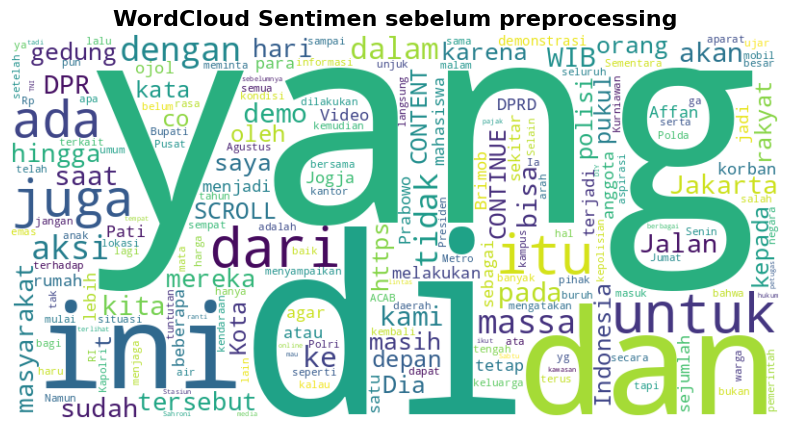

Jumlah kata sebelum preprocessing: 729045


In [ ]:
def make_color_func(hex_color):
    def color_func(*args, **kwargs):
        return hex_color
    return color_func

before_preprocess = " ".join(df['Content'].astype(str).tolist())

# Sebelum tahap preprocessing
wordcloud_before = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False #biar kata yg sama tdk dihitung dua kali
).generate(before_preprocess)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen sebelum preprocessing', fontsize=16, fontweight='bold')
plt.show()
print('Jumlah kata sebelum preprocessing:', len(before_preprocess.split()))

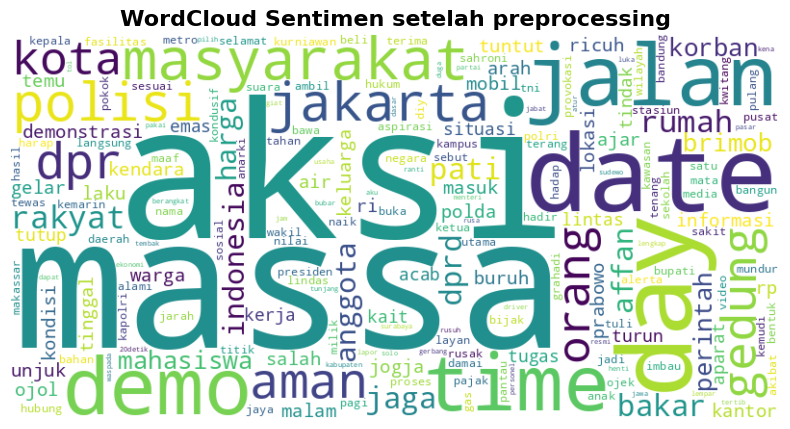

Jumlah kata setelah preprocessing: 425190


In [ ]:
def make_color_func(hex_color):
    def color_func(*args, **kwargs):
        return hex_color
    return color_func

after_preprocess = " ".join(df['Content_string'].tolist())

# Sebelum tahap preprocessing
wordcloud_before = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False #wordcloud hanya akan menampilkan kata-kata tunggal
).generate(after_preprocess)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen setelah preprocessing', fontsize=16, fontweight='bold')
plt.show()
print('Jumlah kata setelah preprocessing:', len(after_preprocess.split()))

#2.**DELIVERABLE** Feature Engineering (Text Representation)

##A. Bag of Words (BoW)

BoW digunakan untuk menghitung frekuensi kemunculan kata di setiap doc, buat digunakan sbg fitur di tahap training.
- (Kekurangan) = tdk bisa membedakan kata yang sama padahal beda makna,
tdk bisa membedakan konteks, dan ga menghitung pentingnya kata
Mengatasinya dengan N-Gram

In [ ]:
df = pd.read_pickle('stemming.pkl')

In [ ]:
df['Content_string'] = df['Content_clean'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(df['Content_string'])

print("Ukuran Matriks BoW:", bow_matrix.shape)

Ukuran Matriks BoW: (6691, 33207)


In [ ]:
feature_names = bow_vectorizer.get_feature_names_out()
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=feature_names)

In [ ]:
df_bow

00  000  001  0010  0014  0017  002  0025  0030  003l1skkdpssiviii2025  \
0      0    0    0     0     0     0    0     0     0                      0   
1      0    0    0     0     0     0    0     0     0                      0   
2      0    0    0     0     0     0    0     0     0                      0   
3      0    0    0     0     0     0    0     0     0                      0   
4      0    0    0     0     0     0    0     0     0                      0   
...   ..  ...  ...   ...   ...   ...  ...   ...   ...                    ...   
6686   0    0    0     0     0     0    0     0     0                      0   
6687   0    0    0     0     0     0    0     0     0                      0   
6688   0    0    0     0     0     0    0     0     0                      0   
6689   0    0    0     0     0     0    0     0     0                      0   
6690   0    0    0     0     0     0    0     0     0                      0   

      ...  zulkiflisaya  zulkiflisebelumnya  zulkipli  zuma  zwolle  \
0     ...             0                   0         0     0       0   
1     ...             0                   0         0     0       0   
2     ...             0                   0         0     0       0   
3     ...             0                   0         0     0       0   
4     ...             0                   0         0     0       0   
...   ...           ...                 ...       ...   ...     ...   
6686  ...             0                   0         0     0       0   
6687  ...             0                   0         0     0       0   
6688  ...             0                   0         0     0       0   
6689  ...             0                   0         0     0       0   
6690  ...             0                   0         0     0       0   

      zwolle20152016  zwolle20162019  zzh  zzhterlihat  zzhyang  
0                  0               0    0            0        0  
1                  0               0    0            0        0  
2                  0               0    0            0        0  
3                  0               0    0            0        0  
4                  0               0    0            0        0  
...              ...             ...  ...          ...      ...  
6686               0               0    0            0        0  
6687               0               0    0            0        0  
6688               0               0    0            0        0  
6689               0               0    0            0        0  
6690               0               0    0            0        0  

[6691 rows x 33207 columns]

In [ ]:
kata = 'demo'

if kata in df_bow.columns:
    frekuensi_kata = df_bow[kata]

    print(f"Frekuensi (Jumlah Kemunculan) untuk Kata '{kata}' di setiap doc:")
    print(frekuensi_kata[frekuensi_kata > 0].sort_values(ascending=False))
else:
    print(f"Kata '{kata}' tidak ada")

Frekuensi (Jumlah Kemunculan) untuk Kata 'demo' di setiap doc:
4876    24
4829    22
4807    14
4990    13
5731    12
        ..
117      1
6607     1
6604     1
6600     1
6595     1
Name: demo, Length: 1562, dtype: int64


In [ ]:
kata = 'acab'

if kata in df_bow.columns:
    frekuensi_kata = df_bow[kata]

    print(f"Frekuensi (Jumlah Kemunculan) untuk Kata '{kata}' di setiap doc:")
    print(frekuensi_kata[frekuensi_kata > 0].sort_values(ascending=False))
else:
    print(f"Kata '{kata}' tidak ada")

Frekuensi (Jumlah Kemunculan) untuk Kata 'acab' di setiap doc:
395    18
515     6
939     4
913     4
706     3
       ..
560     1
561     1
563     1
564     1
553     1
Name: acab, Length: 683, dtype: int64


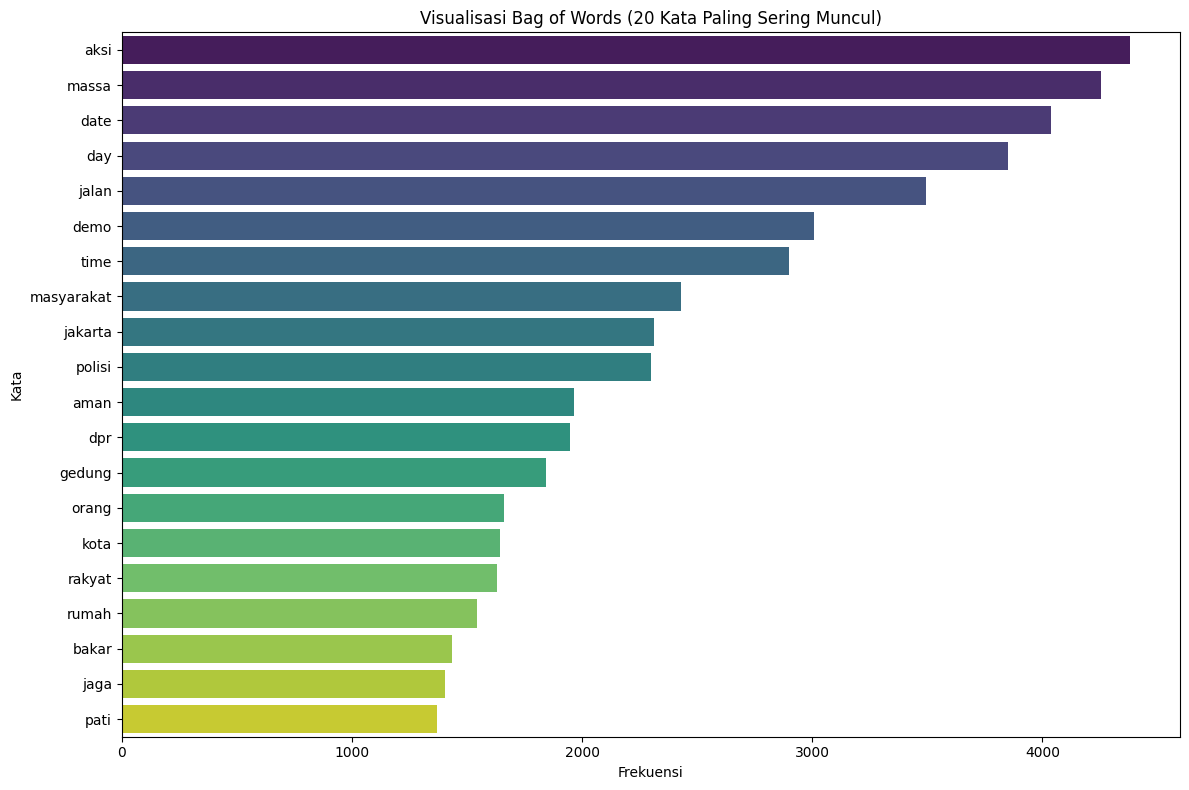

In [ ]:
word_counts = np.sum(bow_matrix.toarray(), axis=0)
word_freq = pd.DataFrame({'word': bow_vectorizer.get_feature_names_out(), 'freq': word_counts})
word_freq = word_freq.sort_values(by='freq', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='freq', y='word', data=word_freq, palette='viridis')
plt.title('Visualisasi Bag of Words (20 Kata Paling Sering Muncul)')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()

##B. TF-IDF

TF-IDF (Term Frequency - Inverse Document Frequency) untuk mengukur relevansi (seberapa penting sebuah kata dalam konteks).

TF = sama kaya BoW
IDF = kata yang muncul di banyak dokumen bakal rendah IDFnya, sedangkan yg jarang muncul tinggi IDF nya.

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content_string'])

print("Ukuran Matriks TF-IDF:", tfidf_matrix.shape)

Ukuran Matriks TF-IDF: (6691, 33207)


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

df_tfidf

00  000  001  0010  0014  0017  002  0025  0030  003l1skkdpssiviii2025  \
0     0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
1     0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
2     0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
3     0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
4     0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
...   ...  ...  ...   ...   ...   ...  ...   ...   ...                    ...   
6686  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
6687  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
6688  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
6689  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   
6690  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0                    0.0   

      ...  zulkiflisaya  zulkiflisebelumnya  zulkipli  zuma  zwolle  \
0     ...           0.0                 0.0       0.0   0.0     0.0   
1     ...           0.0                 0.0       0.0   0.0     0.0   
2     ...           0.0                 0.0       0.0   0.0     0.0   
3     ...           0.0                 0.0       0.0   0.0     0.0   
4     ...           0.0                 0.0       0.0   0.0     0.0   
...   ...           ...                 ...       ...   ...     ...   
6686  ...           0.0                 0.0       0.0   0.0     0.0   
6687  ...           0.0                 0.0       0.0   0.0     0.0   
6688  ...           0.0                 0.0       0.0   0.0     0.0   
6689  ...           0.0                 0.0       0.0   0.0     0.0   
6690  ...           0.0                 0.0       0.0   0.0     0.0   

      zwolle20152016  zwolle20162019  zzh  zzhterlihat  zzhyang  
0                0.0             0.0  0.0          0.0      0.0  
1                0.0             0.0  0.0          0.0      0.0  
2                0.0             0.0  0.0          0.0      0.0  
3                0.0             0.0  0.0          0.0      0.0  
4                0.0             0.0  0.0          0.0      0.0  
...              ...             ...  ...          ...      ...  
6686             0.0             0.0  0.0          0.0      0.0  
6687             0.0             0.0  0.0          0.0      0.0  
6688             0.0             0.0  0.0          0.0      0.0  
6689             0.0             0.0  0.0          0.0      0.0  
6690             0.0             0.0  0.0          0.0      0.0  

[6691 rows x 33207 columns]

In [ ]:
kata_pilihan = 'demo'

if kata_pilihan in df_tfidf.columns:
    skor_kata = df_tfidf[kata_pilihan]

    print(f"Skor TF-IDF untuk Kata '{kata_pilihan}' di setiap doc:")
    print(skor_kata[skor_kata > 0].sort_values(ascending=False))
else:
    print(f"Kata '{kata_pilihan}' tidak ada")

Skor TF-IDF untuk Kata 'demo' di setiap doc:
2891    0.405577
2775    0.382086
2611    0.338661
5250    0.314206
4839    0.310202
          ...   
6181    0.007590
6136    0.007300
6628    0.007167
5954    0.006400
6509    0.005405
Name: demo, Length: 1562, dtype: float64


In [ ]:
kata_pilihan = 'acab'

if kata_pilihan in df_tfidf.columns:
    skor_kata = df_tfidf[kata_pilihan]

    print(f"Skor TF-IDF untuk Kata '{kata_pilihan}' di setiap doc:")
    print(skor_kata[skor_kata > 0].sort_values(ascending=False))
else:
    print(f"Kata '{kata_pilihan}' tidak ada")

Skor TF-IDF untuk Kata 'acab' di setiap doc:
681     1.000000
1044    1.000000
974     1.000000
582     1.000000
349     1.000000
          ...   
728     0.074595
778     0.071119
5307    0.034944
4915    0.024867
6137    0.024634
Name: acab, Length: 683, dtype: float64


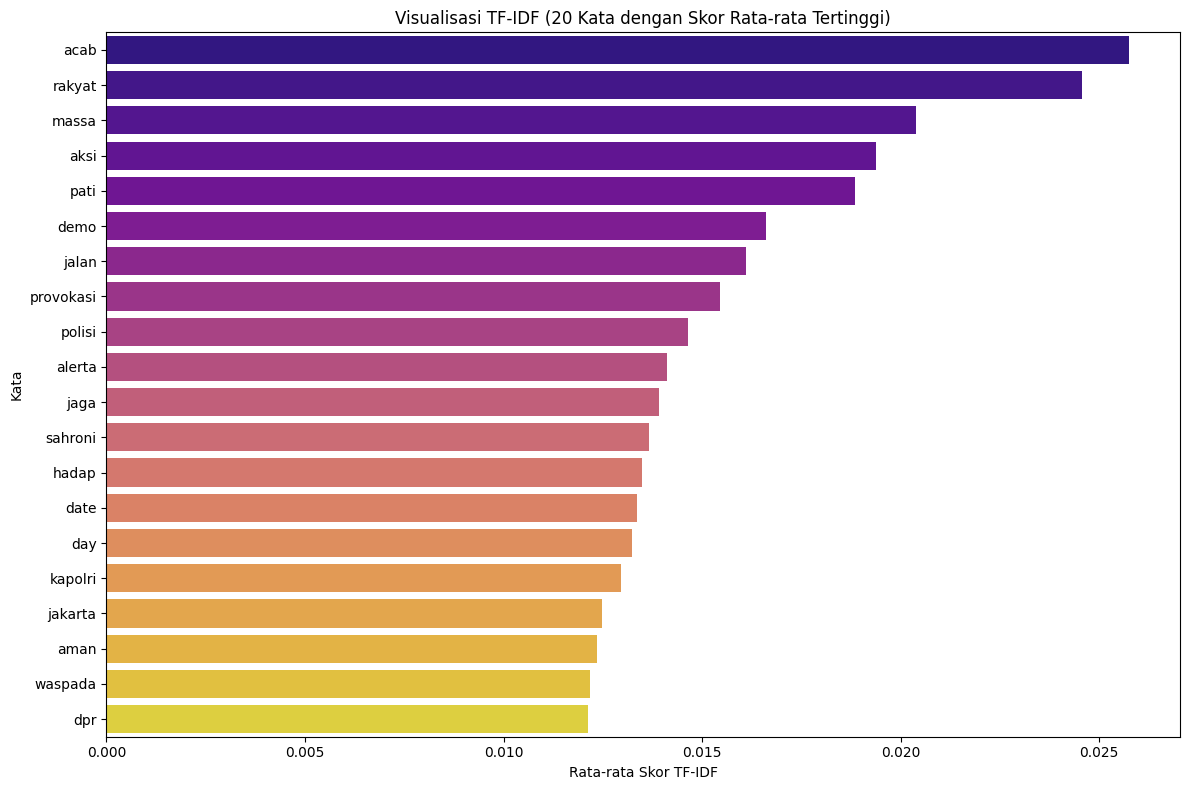

In [ ]:
avg_tfidf_scores = np.mean(tfidf_matrix.toarray(), axis=0)
tfidf_scores = pd.DataFrame({'word': tfidf_vectorizer.get_feature_names_out(), 'avg_tfidf': avg_tfidf_scores})
tfidf_scores = tfidf_scores.sort_values(by='avg_tfidf', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='avg_tfidf', y='word', data=tfidf_scores, palette='plasma')
plt.title('Visualisasi TF-IDF (20 Kata dengan Skor Rata-rata Tertinggi)')
plt.xlabel('Rata-rata Skor TF-IDF')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()

**ANALISIS PERBEDAAN HASIL ANTARA BoW dengan TF-IDF**

Mengapa hasilnya berbeda. Pada awalnya, BoW menghasilkan kata-kata yang populer/banyak aja di semua korpus, tanpa melihat relevansi kata-katanya thd topik yg di definisikan. Sementara, TF-IDF mengukur seberapa sering kata muncul di satu dokumen dan sbrp langka kata itu di dokumen. Misal kata "massa" dan "aksi" pada grafik BoW awalnya paling tinggi, namun setelah menggunakan TF-IDF, kata tsb mendapat hukuman IDF(skor IDF rendah) sehingga turun peringkatnya, dan muncul kata "acab" dan "rakyat". Kata "acab" dan "rakyat" mendapat IDF tinggi karena jarang muncul di dokumen lain. Kata-kata kunci yang mendefinisikan topik bisa menggunakan TF-IDF

##C. Word2Vec (corpus Indonesia)

In [ ]:
!pip install gensim

In [ ]:
#buat ambil langsung dari web
!wget https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2

--2025-09-11 03:21:45--  https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.71, 2620:0:861:3:208:80:154:71
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104548736 (1.0G) [application/octet-stream]
Saving to: ‘idwiki-latest-pages-articles.xml.bz2’

idwiki-latest-pages 100%[===================>]   1.03G  4.43MB/s    in 4m 18s  

2025-09-11 03:26:04 (4.09 MB/s) - ‘idwiki-latest-pages-articles.xml.bz2’ saved [1104548736/1104548736]



In [ ]:
#mengekstrak teks dari dump Wikipedia bahasa Indonesia
from __future__ import print_function

import logging
import os.path
import sys

from gensim.corpora import WikiCorpus

program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))

namaFileInput = "/content/idwiki-latest-pages-articles.xml.bz2"
namaFileOutput = "wiki.id.case.text"

space = " "
i = 0

output = open(namaFileOutput, 'w')

# lower=False: huruf kecil dan besar dibedakan
wiki = WikiCorpus(namaFileInput, dictionary={}, lower=False)
for text in wiki.get_texts():
    output.write(' '.join(text) + '\n')
    i = i + 1
    if i % 10000 == 0:
        logger.info("Saved " + str(i) + " articles")

output.close()
logger.info("Finished Saved " + str(i) + " articles")

INFO:colab_kernel_launcher.py:running /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-799ae0de-f0c9-433f-9e1e-bcbd0d4770eb.json
INFO:colab_kernel_launcher.py:Saved 10000 articles
INFO:colab_kernel_launcher.py:Saved 20000 articles
INFO:colab_kernel_launcher.py:Saved 30000 articles
INFO:colab_kernel_launcher.py:Saved 40000 articles
INFO:colab_kernel_launcher.py:Saved 50000 articles
INFO:colab_kernel_launcher.py:Saved 60000 articles
INFO:colab_kernel_launcher.py:Saved 70000 articles
INFO:colab_kernel_launcher.py:Saved 80000 articles
INFO:colab_kernel_launcher.py:Saved 90000 articles
INFO:colab_kernel_launcher.py:Saved 100000 articles
INFO:colab_kernel_launcher.py:Saved 110000 articles
INFO:colab_kernel_launcher.py:Saved 120000 articles
INFO:colab_kernel_launcher.py:Saved 130000 articles
INFO:colab_kernel_launcher.py:Saved 140000 articles
INFO:colab_kernel_launcher.py:Saved 150000 articles
INFO:colab_kernel_launcher.py:Saved 160

In [ ]:
#Pembuatan Model
import multiprocessing
import logging
import os.path
import sys
import multiprocessing
import gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))

namaFileInput = "wiki.id.case.text"
namaFileOutput = "w2vec_wiki_id_case"

model = Word2Vec(LineSentence(namaFileInput), vector_size=400, window=5, min_count=5, workers=multiprocessing.cpu_count())

# trim unneeded model memory = use (much) less RAM
model.init_sims(replace=True)
model.save(namaFileOutput)

INFO:colab_kernel_launcher.py:running /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-799ae0de-f0c9-433f-9e1e-bcbd0d4770eb.json
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 11659062 words, keeping 366844 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000, processed 18779961 words, keeping 508345 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #30000, processed 23887226 words, keeping 609188 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #40000, processed 28692875 words, keeping 695786 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #50000, processed 34116384 words, keeping 795722 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #60000, processed 38418780 words, keeping 886991 w

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
namaFileModel = '/content/w2vec_wiki_id_case'
model = gensim.models.Word2Vec.load(namaFileModel)

In [ ]:
from google.colab import files
files.download('/content/w2vec_wiki_id_case.syn1neg.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/w2vec_wiki_id_case.wv.vectors.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
import pandas as pd

with open("stemming.pkl", "rb") as f:
    df = pickle.load(f)

# pastikan df berbentuk DataFrame
if not isinstance(df, pd.DataFrame):
    df = pd.DataFrame(df)

# ambil kolom 'Content_clean'
texts = df['Content_clean']

In [ ]:
# Loop tiap token, ambil vector

data_vectors = []  # menyimpan vector per kalimat
for idx, sentence in enumerate(texts):
    sentence_vec = []
    for token in sentence:
        if token in model.wv:
            vec = model.wv[token]
            sentence_vec.append(vec)
            # tampilkan contoh token pertama saja
            if idx == 0:
                print(f"Token: {token}, Dimensi vector: {vec.shape}, contoh 5 nilai pertama: {vec[:5]}")
        else:
            sentence_vec.append(np.zeros(model.vector_size))  # token tidak ada
    data_vectors.append(sentence_vec)

Token: felix, Dimensi vector: (400,), contoh 5 nilai pertama: [-0.03353025  0.05602089 -0.01438716 -0.03148574 -0.02938668]
Token: lawan, Dimensi vector: (400,), contoh 5 nilai pertama: [ 0.04250567  0.07766818  0.03835028 -0.06071286 -0.01496187]


In [ ]:
first_sentence = texts.iloc[0]
first_sentence_vectors = data_vectors[0]

print(f"Kalimat pertama: {first_sentence}\n")

# Loop tiap token di kalimat pertama
for token, vec in zip(first_sentence, first_sentence_vectors):
    print(f"Token: {token}")
    print(f"Vector shape: {vec.shape}")
    print("Vector (400 dimensi):")
    print(vec)  # menampilkan seluruh 400 dimensi
    print("-"*80)

    # Jika hanya ingin contoh token pertama saja:
    break

Kalimat pertama: ['felix', 'lawan']

Token: felix
Vector shape: (400,)
Vector (400 dimensi):
[-3.35302465e-02  5.60208932e-02 -1.43871568e-02 -3.14857438e-02
 -2.93866843e-02  3.53539549e-02 -1.20791256e-01  4.92202863e-02
  9.36815813e-02  7.49434764e-03 -1.94783397e-02 -5.01236953e-02
  3.23541164e-02 -3.59705314e-02  5.15118986e-02  2.75936164e-02
  4.08256240e-03 -5.38636260e-02  2.53689103e-02  3.21675651e-02
 -3.94419348e-03 -1.35245733e-02 -6.80561922e-03 -5.85354753e-02
  2.80736461e-02  2.22260226e-03 -3.00662871e-02 -2.18071435e-02
  4.84242998e-02  3.92843336e-02 -1.14061639e-01 -6.61326572e-02
 -4.45838273e-02 -4.56497297e-02  3.69210877e-02 -2.01159660e-02
 -2.54324470e-02 -9.08609033e-02  1.08127603e-02 -2.48747468e-02
  3.88729200e-02  3.54003608e-02 -6.00444451e-02  2.76519898e-02
  1.68730635e-02 -1.24403462e-02  3.85035127e-02 -9.75086261e-03
 -2.21337117e-02 -2.22096257e-02 -5.04129082e-02  4.91651110e-02
 -2.54867338e-02  1.02050127e-02 -2.92257201e-02 -7.61291459e-

In [ ]:
# simpan semua token dan vector
token_vectors = {}  # key: token, value: vector (numpy array)

for sentence_vec, sentence_tokens in zip(data_vectors, texts):
    for token, vec in zip(sentence_tokens, sentence_vec):
        if token not in token_vectors:
            token_vectors[token] = vec

In [ ]:
# Fungsi Cosine Similarity
def cosine_similarity(a, b):
    if np.all(a==0) or np.all(b==0):
        return 0.0
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
# Fungsi untuk mencari most-similar
def most_similar(token, token_vectors, topn=5):
    if token not in token_vectors:
        return []
    vec = token_vectors[token]
    sims = []
    for t, v in token_vectors.items():
        if t == token:
            continue
        sim = cosine_similarity(vec, v)
        sims.append((t, sim))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    return sims[:topn]

In [ ]:
# Most-similar per token
hasil = most_similar("demo", token_vectors)
print("demo:", hasil)

hasil = most_similar("dpr", token_vectors)
print("dpr:", hasil)

hasil = most_similar("DPR", token_vectors)
print("DPR:", hasil)

hasil = most_similar("polisi", token_vectors)
print("polisi:", hasil)

hasil = most_similar("acab", token_vectors)
print("acab:", hasil)

hasil = most_similar("massa", token_vectors)
print("massa:", hasil)

hasil = most_similar("rakyat", token_vectors)
print("rakyat:", hasil)

demo: [('kaset', 0.56523734), ('tape', 0.49325767), ('lagu', 0.49277282), ('instrumental', 0.4923796), ('video', 0.48543504)]
dpr: [('dpd', 0.70177674), ('dprd', 0.5845638), ('abdul', 0.42573765), ('presidium', 0.42115554), ('nasdem', 0.41982198)]
DPR: []
polisi: [('aparat', 0.5974711), ('preman', 0.54294026), ('demonstran', 0.5329753), ('ambulans', 0.50232536), ('inspektur', 0.5014005)]
acab: [('felix', 0.0), ('lawan', 0.0), ('ngerusak', 0.0), ('fasum', 0.0), ('bikin', 0.0)]
massa: [('partikel', 0.49822253), ('proton', 0.4740341), ('berat', 0.4524606), ('atmosfer', 0.44840994), ('energi', 0.44616383)]
rakyat: [('masyarakat', 0.66095227), ('warga', 0.5776571), ('bangsa', 0.5195346), ('orang', 0.48669648), ('demokrasi', 0.48381147)]


In [ ]:
# Similarity antar kata
def similarity(token1, token2, token_vectors):
    if token1 in token_vectors and token2 in token_vectors:
        return cosine_similarity(token_vectors[token1], token_vectors[token2])
    else:
        return None

sim = similarity("polisi", "demo", token_vectors)
print("Kedekatan polisi-demo:", sim)

sim = similarity("dpr", "rakyat", token_vectors)
print("Kedekatan dpr-rakyat:", sim)

sim = similarity("demokrasi", "dpr", token_vectors)
print("Kedekatan demokrasi-dpr:", sim)

Kedekatan polisi-demo: 0.20368804
Kedekatan dpr-rakyat: 0.07913871
Kedekatan demokrasi-dpr: 0.06740834


In [ ]:
def most_similar_cosmul(positive, negative, token_vectors, topn=5):
    # v = sum(positive) - sum(negative)
    vec = np.zeros(list(token_vectors.values())[0].shape)
    for token in positive:
        if token in token_vectors:
            vec += token_vectors[token]
    for token in negative:
        if token in token_vectors:
            vec -= token_vectors[token]

    sims = []
    for t, v in token_vectors.items():
        if t in positive + negative:
            continue
        sim = cosine_similarity(vec, v)
        sims.append((t, sim))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    return sims[:topn]

# positive = kata-kata yang konteksnya ingin dicari
# negative = kata-kata yang ingin dikurangi pengaruhnya

hasil = most_similar_cosmul(
    positive=['rakyat', 'demo'],
    negative=['DPR'],
    token_vectors=token_vectors
)
print("DPR dikurangi, fokus protes rakyat:", hasil)

hasil = most_similar_cosmul(
    positive=['polisi'],
    negative=['acab'],
    token_vectors=token_vectors
)
print("polisi (tanpa konteks acab):", hasil)

hasil = most_similar_cosmul(
    positive=['DPR', 'demo'],
    negative=['rakyat'],
    token_vectors=token_vectors
)
print("DPR + demo, tapi mengurangi pengaruh rakyat:", hasil)

DPR dikurangi, fokus protes rakyat: [('protes', 0.42528053401866583), ('pantun', 0.41835663603929146), ('demonstrasi', 0.41230512848244144), ('warga', 0.4122282028126004), ('kaset', 0.41169772975963514)]
polisi (tanpa konteks acab): [('aparat', 0.5974711521253819), ('preman', 0.5429402366405099), ('demonstran', 0.5329752302059368), ('ambulans', 0.5023252653936296), ('inspektur', 0.5014004036037228)]
DPR + demo, tapi mengurangi pengaruh rakyat: [('promo', 0.4175898859795218), ('mix', 0.41739073601986953), ('track', 0.40156677768888177), ('kaset', 0.38733448009150717), ('kit', 0.3731273295207909)]


In [ ]:
kalimat = "rakyat demo di depan gedung dpr"
tokens = kalimat.lower().split()

# Ambil vector untuk tiap token (hanya yang valid)
vecs = [token_vectors[t] for t in tokens if t in token_vectors and not np.all(token_vectors[t]==0)]
if len(vecs) == 0:
    raise ValueError("Tidak ada token di kalimat yang ada di vocabulary.")

# Buat vector kalimat: rata-rata semua vector token
vec_kalimat = np.mean(vecs, axis=0)

# Hitung similarity semua token di token_vectors dengan vec_kalimat
sims = []
for t, v in token_vectors.items():
    if np.all(v==0):
        continue  # skip token vector nol
    sim = np.dot(vec_kalimat, v) / (np.linalg.norm(vec_kalimat) * np.linalg.norm(v))
    sims.append((t, sim))

# Sort dan ambil top 10 kata paling mirip
topn = 10
sims = sorted(sims, key=lambda x: x[1], reverse=True)

print(f"Most similar kata untuk kalimatnya: '{kalimat}'\n")
for t, s in sims[:topn]:
    print(f"{t} : {s:.4f}")

Most similar kata untuk kalimatnya: 'rakyat demo di depan gedung dpr'

depan : 0.5803
gedung : 0.5576
rakyat : 0.5383
parlemen : 0.4450
istana : 0.4402
demo : 0.4395
demonstrasi : 0.4306
dpr : 0.4262
keraton : 0.4220
rapat : 0.4182


## D. GloVe (Global Vector)

word embedding berbasis statistik global + konteks lokal, yang menghasilkan vektor kata bermakna semantik. Sementara, Word2Vec itu cuma analisis informasi konteks lokal

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-09-10 04:15:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-10 04:15:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-10 04:15:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
texts = df['Content_clean'].apply(" ".join).tolist()

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)
vocab_length = len(word_tokenizer.word_index) + 1
print("Vocabulary size:", vocab_length)

Vocabulary size: 33240


In [ ]:
# Pad Sequences
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_sentence = max(texts, key=lambda s: len(s.split()))
max_length = len(longest_sentence.split())

train_padded_sentences = pad_sequences(
    embed(texts),
    maxlen=max_length,
    padding='post'
)

print("Max sequence length:", max_length)
print("Shape padded sentences:", train_padded_sentences.shape)

Max sequence length: 1621
Shape padded sentences: (6691, 1621)


In [ ]:
# Load GloVe
embedding_dim = 100
embeddings_dictionary = {}

with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

In [ ]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (33240, 100)


# VISUALISASI t-SNE (Non-linear dimensionality reduction technique)

T-SNE (t-distributed stochastic neighbor embedding)
 (pairwise similarities) antar titik data di ruang berdimensi tinggi, lalu mengoptimalkan representasinya di ruang berdimensi rendah agar kesamaan tersebut tetap terjaga.

+ kelebihan =
1. t-SNE can preserve the spatial relationship between data points after reducing the dimensionality of the data. It means that the nearby data (points with similar characteristics) in the original dimension will still be nearby in the lower dimension! That is why t-SNE is mostly used to find clusters in the data.
2. t-SNE can handle non-linear data

PCA berusaha mengurangi dimensi dengan cara memaksimalkan variansi dalam data,
sementara t-SNE melakukan hal yang sama dengan cara menjaga agar titik data yang mirip tetap berdekatan (dan yang tidak mirip tetap berjauhan) baik di dimensi tinggi maupun dimensi rendah.

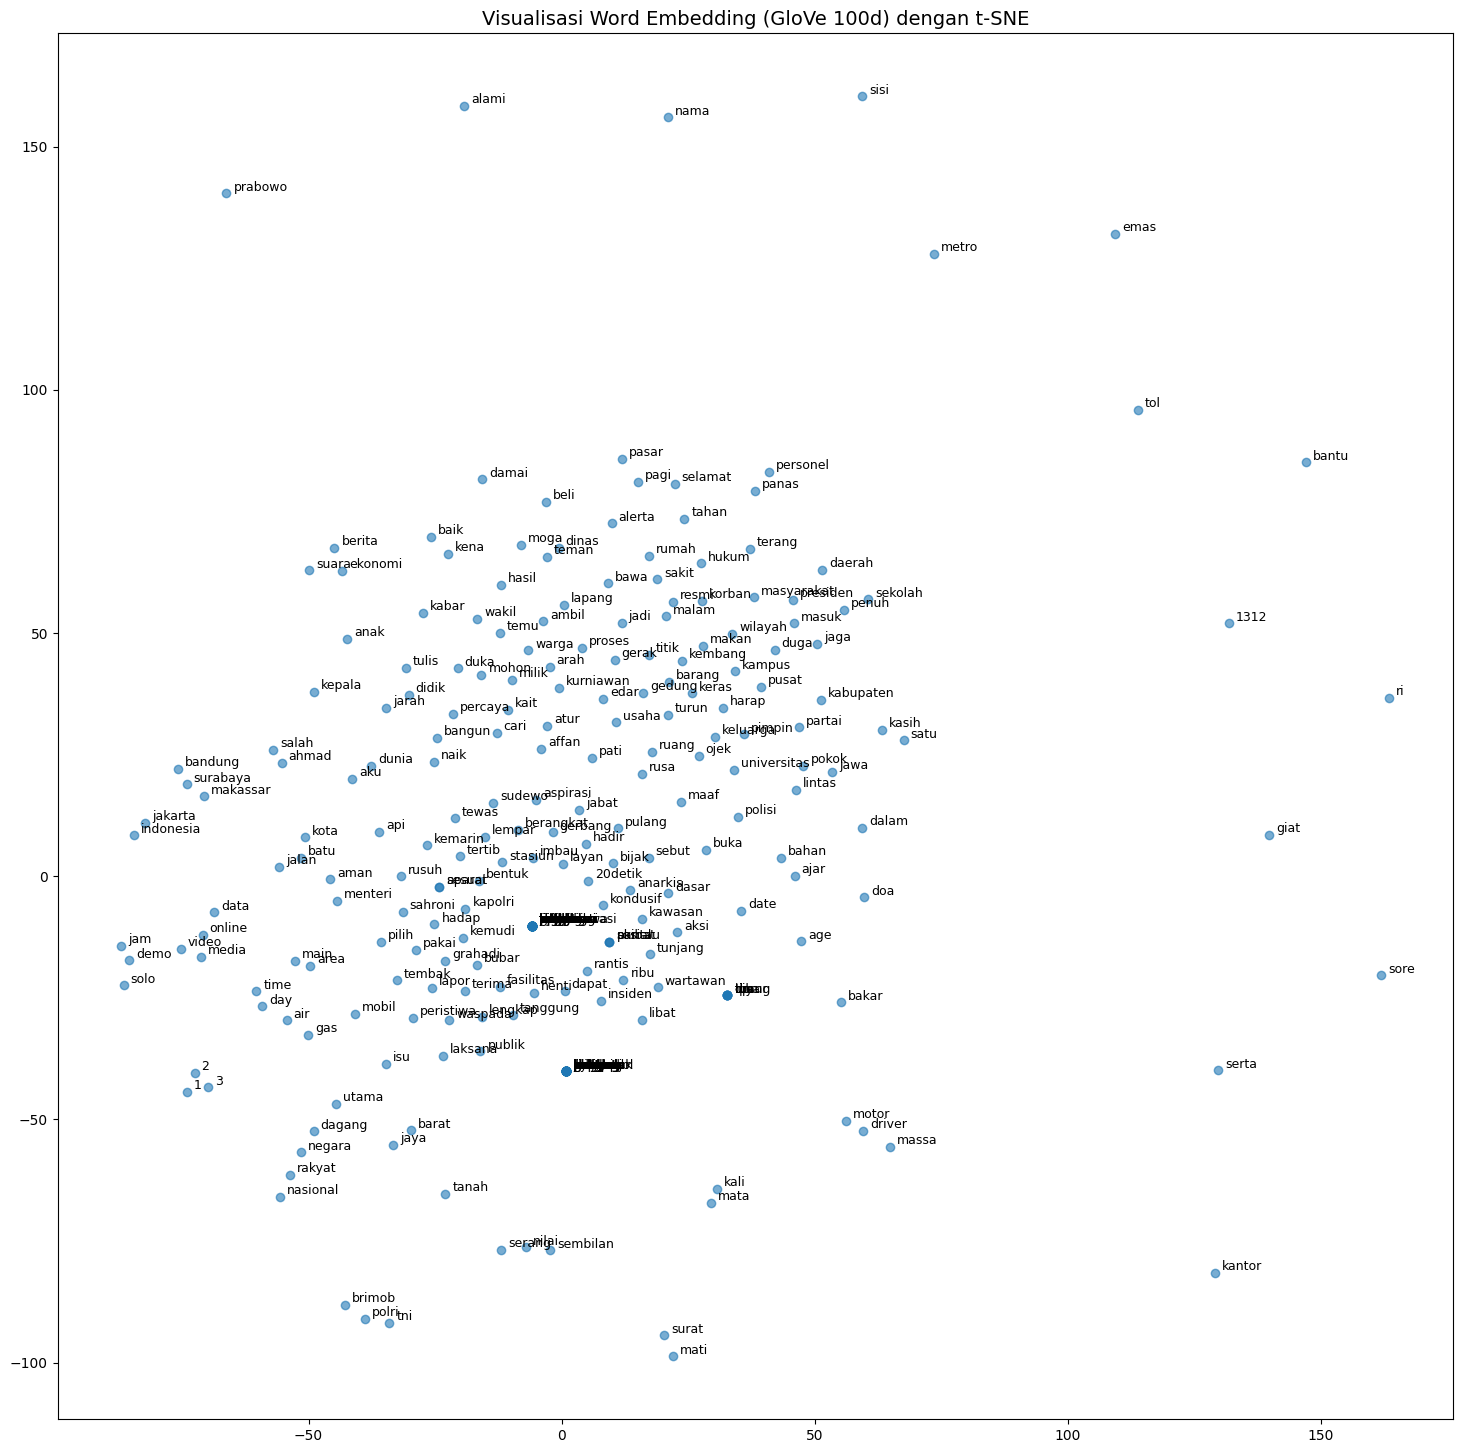

In [ ]:
# Visualisasi t-SNE untuk sebagian kata
words = list(word_tokenizer.word_index.keys())[:300]  # ambil 300 kata pertama
word_vectors = np.array([embedding_matrix[word_tokenizer.word_index[w]] for w in words])

tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=min(30, len(words) - 1),
    n_iter=1000,
    init="pca"
)
vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(18, 18))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                 xytext=(5, 2), textcoords="offset points", fontsize=9)
plt.title("Visualisasi Word Embedding (GloVe 100d) dengan t-SNE", fontsize=14)
plt.show()

PCA is best for feature extraction and preserving global structures.

In [ ]:
# Evaluasi Representasi Kata (Cosine Similarity)
def most_similar(word, topn=5):
    if word not in word_tokenizer.word_index:
        return f"'{word}' tidak ada di vocabulary."
    idx = word_tokenizer.word_index[word]
    word_vec = embedding_matrix[idx].reshape(1, -1)
    similarities = cosine_similarity(word_vec, embedding_matrix)[0]
    similar_indices = similarities.argsort()[-topn-1:-1][::-1]  # ambil top-N selain dirinya sendiri
    similar_words = [(w, similarities[i]) for w, i in word_tokenizer.word_index.items() if i in similar_indices]
    return similar_words

test_words = ["polisi", "demo", "acab", "dpr"] #diganti kalimat
for w in test_words:
    print(f"\nKata yang dekat dengan '{w}':")
    print(most_similar(w, topn=5))


Kata mirip dengan 'polisi':
[('lobi', np.float64(0.4629290038226494)), ('bapak', np.float64(0.4620598601352726)), ('angkasa', np.float64(0.45032158614876483)), ('rano', np.float64(0.4722848412652507)), ('totok', np.float64(0.4687828046139176))]

Kata mirip dengan 'demo':
[('video', np.float64(0.6177106681462012)), ('band', np.float64(0.5992629517035153)), ('studio', np.float64(0.6067303020717825)), ('release', np.float64(0.6177122656857621)), ('dvd', np.float64(0.6040194159727755))]

Kata mirip dengan 'acab':
[('bangjo', np.float64(0.0)), ('alviansedangkan', np.float64(0.0)), ('daritrafficmerah', np.float64(0.0)), ('mendapatkantrafficmerah', np.float64(0.0)), ('duniaterpental', np.float64(0.0))]

Kata mirip dengan 'dpr':
[('mpr', np.float64(0.4381206047929492)), ('rok', np.float64(0.5211119641299478)), ('sk', np.float64(0.4585784641803358)), ('korea', np.float64(0.5365050196388834)), ('taek', np.float64(0.4817956826541291))]


# CLASSICAL MODEL untuk Topic Modelling

###Latent Dirichlet Allocation (LDA) menggunakan BoW

Tujuan: Menemukan topik tersembunyi di kumpulan dokumen.

Cara:
1. Dokumen dianggap campuran beberapa topik.
2. Setiap topik terdiri dari kumpulan kata yang saling terkait.
Misal: dokumen tentang politik + ekonomi → topik 0 = “politik” (kata: dpr, pemerintah), topik 1 = “ekonomi” (kata: harga, pasar).

Output: Distribusi topik per dokumen + kata-kata dominan tiap topik.

Cocok untuk: Memahami tema/topik dari teks panjang atau banyak dokumen.

Catatan: Topik itu “soft assignment” → satu dokumen bisa punya lebih dari satu topik.

In [ ]:
!pip install --upgrade gensim pyLDAvis spacy pandas scikit-learn
import spacy.cli
spacy.cli.download("en_core_web_md")

import pandas as pd
import string
import spacy
import nltk
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from nltk.corpus import stopwords
import en_core_web_md
nltk.download('wordnet')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 109.1 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: p

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


True

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

tokenized_reviews = [doc.split() for doc in df['Content_string']]
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(text) for text in tokenized_reviews]

In [ ]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=10,          # jumlah topik
    random_state=100,
    chunksize=1000,
    passes=20,
    iterations=100
)

In [ ]:
topics = lda_model.print_topics(num_words=10)
print("\nTopik yang ditemukan:\n")
for idx, topic in topics:
    print(f"Topik {idx}: {topic}")


Topik yang ditemukan:

Topik 0: 0.042*"harga" + 0.028*"bahan" + 0.025*"pokok" + 0.019*"penuh" + 0.018*"serta" + 0.016*"sembilan" + 0.016*"halte" + 0.014*"2025" + 0.013*"isu" + 0.013*"siswa"
Topik 1: 0.029*"aksi" + 0.015*"masyarakat" + 0.015*"dpr" + 0.014*"demo" + 0.012*"perintah" + 0.011*"keluarga" + 0.011*"demonstrasi" + 0.011*"indonesia" + 0.011*"arah" + 0.009*"tuntut"
Topik 2: 0.041*"kota" + 0.035*"anggota" + 0.027*"ajar" + 0.026*"aksi" + 0.020*"buruh" + 0.018*"aspirasi" + 0.018*"unjuk" + 0.015*"kerja" + 0.015*"wilayah" + 0.014*"gelar"
Topik 3: 0.123*"kantor" + 0.054*"kondusif" + 0.053*"titik" + 0.042*"kampus" + 0.020*"bandung" + 0.019*"acab" + 0.018*"dana" + 0.018*"alerta" + 0.017*"reformasi" + 0.016*"rasa"
Topik 4: 0.024*"emas" + 0.017*"rakyat" + 0.016*"terima" + 0.014*"harga" + 0.014*"beli" + 0.014*"nilai" + 0.013*"milik" + 0.012*"tenang" + 0.012*"lempar" + 0.010*"publik"
Topik 5: 0.093*"date" + 0.088*"day" + 0.031*"pati" + 0.024*"lokasi" + 0.019*"bupati" + 0.018*"jaga" + 0.015*

In [ ]:
print('\nPerplexity:', lda_model.log_perplexity(doc_term_matrix))
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=tokenized_reviews,
    dictionary=dictionary, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Perplexity: -8.796289262368461
Coherence Score: 0.35379017068404417


Perplexity mengukur seberapa bingung model ketika harus memprediksi kata-kata dalam dokumen. Semakin rendah berarti model lebih baik karena artinya model bisa menjelaskan data dengan lebih baik.

Coherence mengukur seberapa koherensi data nya masuk ke dalam topiknya. Rentang skor nya maksimal 1.

In [ ]:
# Contoh rule-based: kasih label sesuai kata-kata dominan
def label_topic(topic_words):
    if any(w in topic_words for w in ["pemerintah","dpr","politik","partai"]):
        return "Politik"
    elif any(w in topic_words for w in ["korupsi","kejahatan","kasus","narkoba"]):
        return "Kejahatan"
    elif any(w in topic_words for w in ["uang","ekonomi","pasar","harga"]):
        return "Ekonomi"
    elif any(w in topic_words for w in ["sepakbola","tim","pertandingan","gol"]):
        return "Olahraga"
    else:
        return "Umum"

print("\nTopik dengan label otomatis:")
for idx, topic in topics:
    words = topic.split("+")
    words = [w.split("*")[1].replace('"','') for w in words]
    label = label_topic(words)
    print(f"Topik {idx} → {label} → {words}")


Topik dengan label otomatis:
Topik 0 → Umum → ['harga ', 'bahan ', 'pokok ', 'penuh ', 'serta ', 'sembilan ', 'halte ', '2025 ', 'isu ', 'siswa']
Topik 1 → Umum → ['aksi ', 'masyarakat ', 'dpr ', 'demo ', 'perintah ', 'keluarga ', 'demonstrasi ', 'indonesia ', 'arah ', 'tuntut']
Topik 2 → Umum → ['kota ', 'anggota ', 'ajar ', 'aksi ', 'buruh ', 'aspirasi ', 'unjuk ', 'kerja ', 'wilayah ', 'gelar']
Topik 3 → Umum → ['kantor ', 'kondusif ', 'titik ', 'kampus ', 'bandung ', 'acab ', 'dana ', 'alerta ', 'reformasi ', 'rasa']
Topik 4 → Umum → ['emas ', 'rakyat ', 'terima ', 'harga ', 'beli ', 'nilai ', 'milik ', 'tenang ', 'lempar ', 'publik']
Topik 5 → Umum → ['date ', 'day ', 'pati ', 'lokasi ', 'bupati ', 'jaga ', 'tutup ', 'sudewo ', 'jadi ', 'satu']
Topik 6 → Umum → ['gedung ', 'bakar ', 'rumah ', 'orang ', 'rp ', 'kendara ', 'warga ', 'bangun ', 'imbau ', 'makassar']
Topik 7 → Umum → ['ojek ', 'aku ', 'masingmasing ', 'markas ', 'panas ', 'makan ', 'hotel ', 'demonstran ', 'normal ',

In [ ]:
# Visualisasi
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


###K-Means menggunakan hasil word embedding Word2Vec

Tujuan: Mengelompokkan data (dalam hal ini kata atau dokumen) menjadi cluster yang mirip.

Bagaimana:
1. Berdasarkan jarak (misal cosine similarity atau Euclidean) antar vektor.
2. Kata atau dokumen yang mirip akan masuk ke cluster yang sama.

Output: Label cluster untuk tiap data.

Cocok untuk: Kelompokkan dokumen/word embeddings secara sederhana.

Catatan: Cluster itu “hard assignment” → satu data cuma masuk satu cluster saja.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [ ]:
tokens = list(token_vectors.keys())
vectors = np.array(list(token_vectors.values()))

print("Jumlah token:", len(tokens))
print("Dimensi vektor:", vectors.shape)

Jumlah token: 33253
Dimensi vektor: (33253, 400)


In [ ]:
num_clusters = 8  # coba-coba jumlah cluster (ubah sesuai kebutuhan)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(vectors)

# Simpan hasil ke dictionary: token -> cluster
clustered_tokens = {t: labels[i] for i, t in enumerate(tokens)}

In [ ]:
# Evaluasi
sil_score = silhouette_score(vectors, labels)
db_score = davies_bouldin_score(vectors, labels)
ch_score = calinski_harabasz_score(vectors, labels)

print("\Evaluasi Clustering Word2Vec + KMeans")
print("Silhouette Score :", sil_score)
print("Davies-Bouldin Index :", db_score)
print("Calinski-Harabasz Index :", ch_score)

\Evaluasi Clustering Word2Vec + KMeans
Silhouette Score : 0.6100410348549254
Davies-Bouldin Index : 3.9558529341434596
Calinski-Harabasz Index : 1181.4605685688016


Silhouette Score: 0.61 → cukup bagus. Nilai 0–1, makin mendekati 1 makin jelas cluster-nya. Artinya kata-kata yang mirip secara vektor cenderung berada di cluster yang sama.

Davies-Bouldin Index (DBI): 3.95 → makin kecil makin baik. DBI ini agak tinggi, artinya ada beberapa cluster yang masih agak mirip satu sama lain.

Calinski-Harabasz Index (CHI): 1181 → makin besar makin bagus, cluster cukup terpisah.

In [ ]:
print("\nContoh token per cluster:")
for c in range(num_clusters):
    cluster_words = [t for t, lbl in clustered_tokens.items() if lbl == c]
    print(f"Cluster {c}: {cluster_words[:10]}")  # tampilkan 10 kata pertama


Contoh token per cluster:
Cluster 0: ['nyala', 'api', 'anjing', 'tong', 'sampah', 'pakai', 'air', 'mata', 'tidur', 'kandang']
Cluster 1: ['ngerusak', 'ujung2nya', 'dmn', '1312', 'gabisa', 'pindah', 'wkwkwkkw', 'jimin', 'gara2', 'menang']
Cluster 2: ['bikin', 'ribut', 'si', 'duga', 'galau', 'sembuh', 'cari', 'biar', 'marah', 'kaya']
Cluster 3: ['bandung', 'emang', 'tara', 'sane', 'iki', 'lho', 'sugan', 'me', 'ting', 'rangkai']
Cluster 4: ['lawan', 'demo', 'aksi', 'palsu', 'serang', 'otak', 'provokasi', 'update', 'cepat', 'tindak']
Cluster 5: ['kampus', 'teman', 'jakarta', 'indonesia', 'sakit', 'rakyat', 'salah', 'polisi', 'langgar', 'bantu']
Cluster 6: ['flyer', 'on', 'stay', 'safe', 'story', 'got', 'poor', 'you', 'rot', 'in']
Cluster 7: ['felix', 'fasum', 'sebel', 'dengkul', 'skrg', 'abri', 'univ', 'keparat', 'unisba', 'bego']


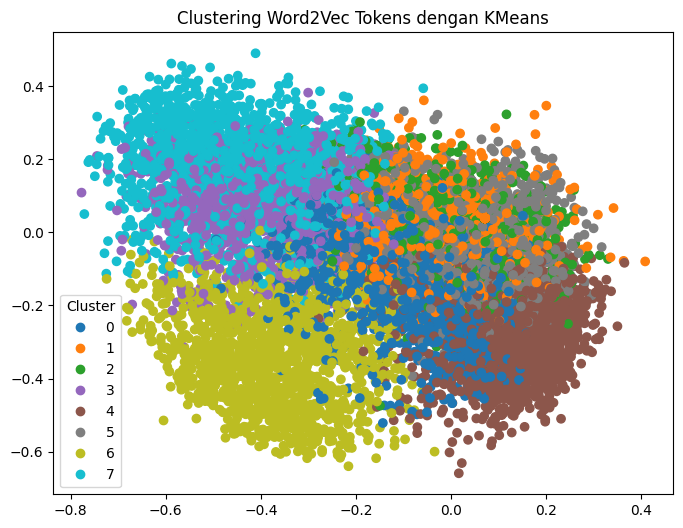

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
scatter = plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap="tab10")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("Clustering Word2Vec Tokens dengan KMeans")
plt.show()

K-Means + Word2Vec: lebih cocok untuk mengelompokkan kata/token berdasarkan makna. Hasil cluster relatif jelas, evaluasi cukup baik (silhouette ~0.61).

LDA + BoW: lebih cocok untuk menemukan topik dokumen tapi hasil topiknya belum tajam (coherence ~0.35).